In [1]:
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import imblearn

from matplotlib import style
style.use('dark_background')
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
style.use('dark_background')

In [2]:
os.getcwd()

'/home/gary/Documents/springboard/ultimate_challenge'

In [3]:
with open('/home/gary/Documents/springboard/ultimate_challenge/logins.json') as l:
    logins = json.load(l)
with open('/home/gary/Documents/springboard/ultimate_challenge/ultimate_data_challenge.json') as c:
    challenge = json.load(c)
    
dfl = pd.DataFrame.from_dict(logins)
dfc = pd.DataFrame.from_dict(challenge)

In [4]:
dfl

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [5]:
dfl['login_time'] = pd.to_datetime(dfl['login_time'])
dfl.index = dfl['login_time']
dflc = pd.DataFrame(pd.to_datetime(dfl['login_time']).resample('15Min').count())
dflc.columns = ['login_count']
dflc['login_time'] = dflc.index

dflc

,login_count,login_time
login_time,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00
1970-01-01 20:15:00,6,1970-01-01 20:15:00
1970-01-01 20:30:00,9,1970-01-01 20:30:00
1970-01-01 20:45:00,7,1970-01-01 20:45:00
1970-01-01 21:00:00,1,1970-01-01 21:00:00
...,...,...
1970-04-13 17:45:00,5,1970-04-13 17:45:00
1970-04-13 18:00:00,5,1970-04-13 18:00:00
1970-04-13 18:15:00,2,1970-04-13 18:15:00


In [6]:
print(dfl.isnull().sum())

login_time    0
dtype: int64


<AxesSubplot:xlabel='login_time'>

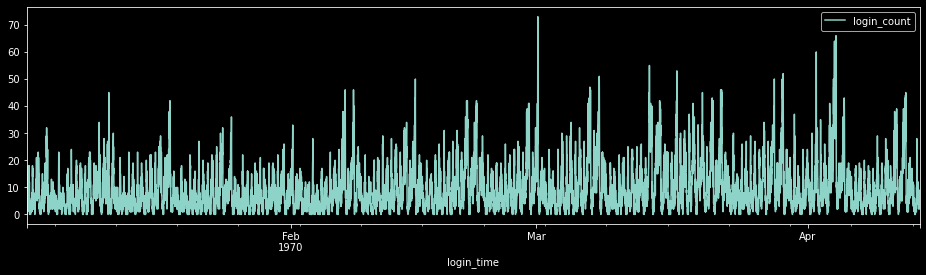

In [7]:
dflc.plot(x = 'login_time', y = 'login_count', figsize=(16, 4))

The time series data appears to be seasonal showing similiar patterns every week.

<AxesSubplot:xlabel='login_time'>

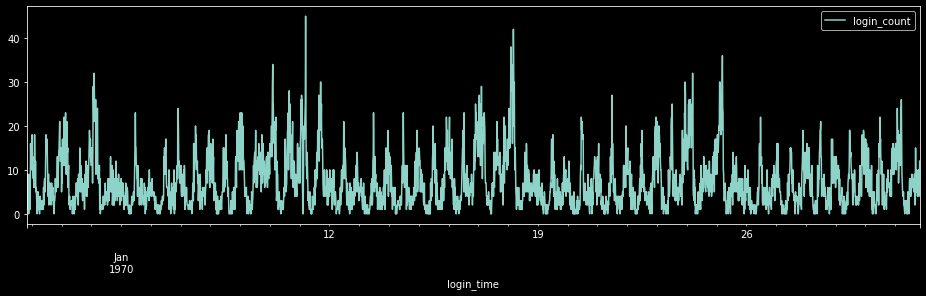

In [8]:
dflc.iloc[0:2880].plot(x = 'login_time', y = 'login_count', figsize=(16, 4))

There seems to be more activity at the start/end of every week.

<AxesSubplot:xlabel='login_time'>

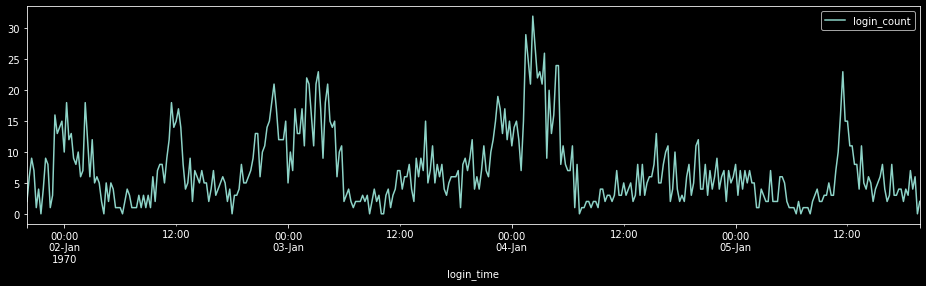

In [9]:
dflc.iloc[0:384].plot(x = 'login_time', y = 'login_count', figsize=(16, 4))

The hours of 12am and 12pm seem to be the most active hours.

In [10]:
dfc

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [11]:
dfc.pop('phone')
dfc = pd.concat([dfc, pd.get_dummies(dfc['city'])], axis = 1)
print(dfc.isnull().sum())

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
Astapor                      0
King's Landing               0
Winterfell                   0
dtype: int64


In [12]:
dfc['days_since_last_trip'] = (max(pd.to_datetime(dfc['last_trip_date'])) - pd.to_datetime(dfc['last_trip_date'])).astype(int)
dfc['retained'] = dfc['days_since_last_trip'] <= 30
dfc['retained'].describe()

count     50000
unique        2
top       False
freq      49452
Name: retained, dtype: object

In [13]:
dfc = dfc.dropna()
dfc['signup_month'] = pd.to_datetime(dfc['signup_date']).dt.month.astype(int)
dfc.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'surge_pct', 'ultimate_black_user',
       'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'Astapor',
       'King's Landing', 'Winterfell', 'days_since_last_trip', 'retained',
       'signup_month'],
      dtype='object')

In [14]:
dfc

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Astapor,King's Landing,Winterfell,days_since_last_trip,retained,signup_month
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,0,1,0,1209600000000000,False,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,1,0,0,4924800000000000,False,1
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,1,0,0,15120000000000000,False,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,0,1,0,172800000000000,False,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,0,0,1,9331200000000000,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,Astapor,3,2014-01-03,4.8,1.11,2014-07-01,11.1,True,55.6,2.53,4.7,1,0,0,0,True,1
49994,Astapor,1,2014-01-03,4.6,1.44,2014-05-31,37.5,False,25.0,2.25,4.5,1,0,0,2678400000000000,False,1
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,0.0,False,100.0,5.63,4.2,0,1,0,2246400000000000,False,1
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,0.0,True,100.0,3.86,5.0,0,0,1,3456000000000000,False,1


In [15]:
X = dfc.drop(['city', 'last_trip_date', 'days_since_last_trip', 'retained', 'signup_date'], axis = 1)
y = dfc['retained']

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

print(y.describe())

from sklearn.model_selection import train_test_split
xtr, xte, ytr, yte = train_test_split(X, y, test_size = 0.2, random_state = 42)

count     82424
unique        2
top        True
freq      41212
Name: retained, dtype: object


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

pg = {'bootstrap':[True, False], 
      'max_depth':np.arange(2, 10), 
      'min_samples_leaf': np.arange(2, 5), 
      'min_samples_split': np.arange(2, 5)}
forest = RandomForestClassifier(n_estimators = 100)
forest_cv= GridSearchCV(estimator = forest, param_grid = pg, cv = 5)
forest_cv.fit(X, y)

print("Best Score:" + str(forest_cv.best_score_))
print("Best Parameters: " + str(forest_cv.best_params_))

#the best parameters are {'bootstrap': False, 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 3}

Best Score:0.9258590276822509
Best Parameters: {'bootstrap': False, 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 4}


In [ ]:
from sklearn.metrics import classification_report

forest = RandomForestClassifier(n_estimators = 1000, 
                                bootstrap = forest_cv.best_params_['bootstrap'], 
                                max_depth = forest_cv.best_params_['max_depth'], 
                                min_samples_leaf = forest_cv.best_params_['min_samples_leaf'], 
                                min_samples_split = forest_cv.best_params_['min_samples_split'])
forest.fit(xte, yte)
ypr = forest.predict(xte)
print(pd.DataFrame(classification_report(yte, ypr, output_dict=True)).transpose())

#balancing the data with SMOTE and applying random forest creates a model that is 94% accurate

In [ ]:
feature_importance = forest.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:15]
sorted_idx = np.argsort(feature_importance)[:15]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,5))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, xtr.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

#most important variable is avg_rating_by_driver by far 
#followed by avg_rating_of_driver and whether theyre in astapor

In [ ]:
sns.regplot(x = X.avg_rating_by_driver, y = y, logistic=True)